In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Algebra 2

## Elementwise Multiplication

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 \\ 5 \\ 6
\end{bmatrix}$

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 & 5 & 6
\end{bmatrix}$

In [2]:
# How can we convert np.array([1, 2, 3]) into a vertical array, 
# that is a 3 x 1 using .reshape?
v1 = np.array([1, 2, 3]).reshape(-1, 1)
v1

array([[1],
       [2],
       [3]])

In [3]:
v2 = np.array([4, 5, 6]).reshape(-1, 1)
v2

array([[4],
       [5],
       [6]])

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 \\ 5 \\ 6
\end{bmatrix}$
\=
$\begin{bmatrix}
4 \\ 10 \\ 18
\end{bmatrix}$

In [4]:
v1 * v2 # 1*4, 2*5, 3*6

array([[ 4],
       [10],
       [18]])

In [5]:
v2.T

array([[4, 5, 6]])

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 & 5 & 6
\end{bmatrix}$
\=
?

In [6]:
v1 * v2.T # how is this working?

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

## Broadcast

When compute A * B:
- If A and B have the same number of dimensions: 
    - Match the size of any dim by stretching 1 => N (rule 1)
- else: 
    - add dimensions of size 1 to the beginning of a shape (rule 2)

Elementwise multiplication between `v1 * v2.T` will automatically 
- "Broadcast" v1 to 3 x 3 (stretching the second dimension) and 
- "Broadcast" v2.T to 3 x 3 (stretching the first dimension).

In [7]:
v1.shape

(3, 1)

In [8]:
v2.T.shape

(1, 3)

How can we manually replicate that? 

#### `np.concatenate([a1, a2, ...], axis=0)`.
- `a1, a2, …`: sequence of arrays
- `axis`: the dimension along with we want to join the arrays
    - default value is 0, which is for row dimension (vertically)
    - value of 1 is for column dimension (horizontally)

In [9]:
v1

array([[1],
       [2],
       [3]])

In [10]:
v1.shape

(3, 1)

In [11]:
# Broadcast v1 to 3 x 3 (stretching the second dimension)
v1_broadcast = np.concatenate([v1, v1, v1], axis=1)
v1_broadcast

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [12]:
v2.T

array([[4, 5, 6]])

In [13]:
v2.T.shape

(1, 3)

In [14]:
# Broadcast v2.T to 3 x 3 (stretching the second dimension)
v2t_broadcast = np.concatenate([v2.T, v2.T, v2.T], axis=0)
v2t_broadcast

array([[4, 5, 6],
       [4, 5, 6],
       [4, 5, 6]])

In [15]:
v1_broadcast * v2t_broadcast # same as v1 * v2.T

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [16]:
v1 * v2.T

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [17]:
v2.T * v1

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

#### Generate a multiplication table from 1 to 10

In [18]:
# 1. generate a range of numbers from 1 to 10
# 2. reshape to make it 2D
digits = np.arange(1, 11).reshape(-1, 1)
digits

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [19]:
digits * digits.T

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

In [20]:
# Convert the multiplication table into a DataFrame
pd.DataFrame(digits * digits.T, columns=digits.reshape(-1), index=digits.reshape(-1))

,1,2,3,4,5,6,7,8,9,10
1,1,2,3,4,5,6,7,8,9,10
2,2,4,6,8,10,12,14,16,18,20
3,3,6,9,12,15,18,21,24,27,30
4,4,8,12,16,20,24,28,32,36,40
5,5,10,15,20,25,30,35,40,45,50
6,6,12,18,24,30,36,42,48,54,60
7,7,14,21,28,35,42,49,56,63,70
8,8,16,24,32,40,48,56,64,72,80
9,9,18,27,36,45,54,63,72,81,90
10,10,20,30,40,50,60,70,80,90,100


#### Back to bug example

Let's do more complex broadcasting example

In [21]:
# Read "bug.jpg" into a numpy array
a = plt.imread("bug.jpg")
a.shape

(1688, 2521, 3)

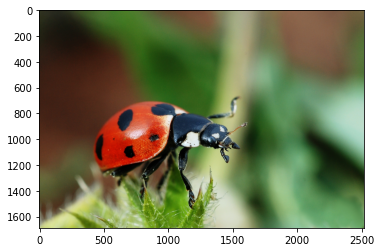

In [22]:
# Display "bug.jpg"
plt.imshow(a)

#### GOAL: create a fade effect (full color on the left, to black on the right)

- To achieve this, we need to:
    1. multiply the left most columns with numbers close to 1's (retains the original color)
    2. the rightmost columns with numbers close to 0's (0 will give us black color)
    3. the middle columns with numbers close to 0.5's

In [23]:
a.shape

(1688, 2521, 3)

In [24]:
# Create an array called fade with 2521 numbers
fade = 1 - np.arange(2521) / 2521
print(fade.shape)
fade
# How many dimensions does fade have? 1

(2521,)


array([1.00000000e+00, 9.99603332e-01, 9.99206664e-01, ...,
       1.19000397e-03, 7.93335978e-04, 3.96667989e-04])

In [25]:
a.shape

(1688, 2521, 3)

How can we multiply `a` and `fade`? That is how do we `reshape` `fade`?

Can we reshape fade to 1688 x 2521 x 3?

In [26]:
fade.reshape(1688, 2521, 3)

ValueError: cannot reshape array of size 2521 into shape (1688,2521,3)

The answer is no - because `reshape` can never add new values / delete values. Meaning after `reshape`, we need to exactly have 2521 values.

In [27]:
# Keep in mind that we need to multiple each column by a number, 
# so which dimension should be 2521?
fade.reshape(1, 2521, 1)

array([[[1.00000000e+00],
        [9.99603332e-01],
        [9.99206664e-01],
        ...,
        [1.19000397e-03],
        [7.93335978e-04],
        [3.96667989e-04]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


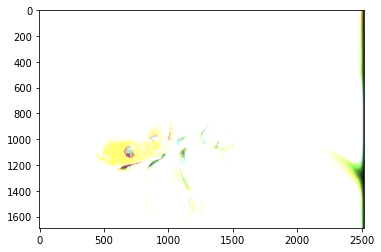

In [28]:
# Let's multiple a by reshaped fade
plt.imshow(a * fade.reshape(1, 2521, 1))

Why doesn't this work? Remember pixels can be either represented using the values 0 to 255 or 0 to 1. `a` has the scale 0 to 255 and `fade.reshape(...)` has the scale 0 to 1.

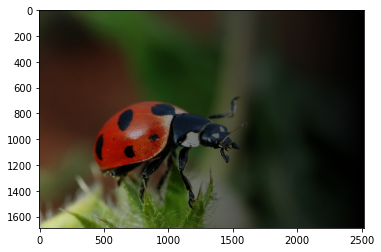

In [29]:
plt.imshow(a / 255.0 * fade.reshape(1, 2521, 1))

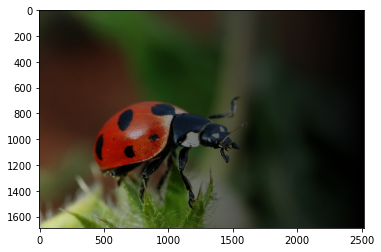

In [30]:
# version 2
plt.imshow(a / 255.0 * fade.reshape(2521, 1))
# BROADCAST: (2521, 1) = rule 2 => (1, 2521, 1) = rule 1 => (1688, 2521, 3)

## Matrix Multiplication

$\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
\cdot
\begin{bmatrix}
4 \\ 5 \\ 6
\end{bmatrix}$

In [31]:
v1

array([[1],
       [2],
       [3]])

In [32]:
v2

array([[4],
       [5],
       [6]])

#### `m1 @ m2`

In [33]:
v1.T @ v2     # 1*4 + 2*5 + 3*6

array([[32]])

#### `.item()` gives you just the values

In [34]:
(v1.T @ v2).item()   # pulls out the only number in the results

32

## Predicting with Matrix Multiplication

1. use case for matrix multiplication:
    - `y = Xc + b`
2. one's column
3. matrix multiply vector

$\begin{bmatrix}
1 & 2 \\ 3 & 4\\
\end{bmatrix}
\cdot
\begin{bmatrix}
10 \\ 1 \\
\end{bmatrix}$

In [35]:
houses = pd.DataFrame([[2, 1, 1985],
                       [3, 1, 1998],
                       [4, 3, 2005],
                       [4, 2, 2020]],
                      columns=["beds", "baths", "year"])
houses

,beds,baths,year
0,2,1,1985
1,3,1,1998
2,4,3,2005
3,4,2,2020


In [36]:
def predict_price(house):
    """
    Takes row (as Series) as argument,
    returns estimated price (in thousands)
    """
    return ((house["beds"]*42.3) + (house["baths"]*10) + 
            (house["year"]*1.67) - 3213)

predict_price(houses.iloc[0])

196.54999999999973

In [37]:
# How do we convert a DataFrame into a numpy array?
X = houses.values
X

array([[   2,    1, 1985],
       [   3,    1, 1998],
       [   4,    3, 2005],
       [   4,    2, 2020]])

In [38]:
# Extract just first row of data
house0 = X[0:1, :]
house0

array([[   2,    1, 1985]])

In [39]:
# Create a vertical array (3 x 1) with the co-efficients
c = np.array([42.3, 10, 1.67]).reshape(-1, 1)
c

array([[42.3 ],
       [10.  ],
       [ 1.67]])

In [40]:
# horizontal @ vertical
house0 @ c

array([[3409.55]])

`y = Xc + b`

In [41]:
house0 @ c - 3213

array([[196.55]])

Let's add the intercept to the c vector for ease.

In [42]:
c = np.array([42.3, 10, 1.67, -3213]).reshape(-1, 1)
c

array([[ 4.230e+01],
       [ 1.000e+01],
       [ 1.670e+00],
       [-3.213e+03]])

If we directly try matrix multiplication now, it won't work because of difference in dimensions.

In [43]:
house0 @ c

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

In [44]:
house0.shape

(1, 3)

In [45]:
c.shape

(4, 1)

#### One's column

- Solution, add a 1's column to `X` using `np.concatenate`

In [46]:
# How can we generate an array of 1's using numpy?
ones_column = np.ones(4).reshape(-1, 1)
ones_column

array([[1.],
       [1.],
       [1.],
       [1.]])

In [47]:
X = np.concatenate([X, ones_column], axis=1)
X

array([[2.000e+00, 1.000e+00, 1.985e+03, 1.000e+00],
       [3.000e+00, 1.000e+00, 1.998e+03, 1.000e+00],
       [4.000e+00, 3.000e+00, 2.005e+03, 1.000e+00],
       [4.000e+00, 2.000e+00, 2.020e+03, 1.000e+00]])

In [48]:
# Let's extract house0 again
house0 = X[0:1, :]
house0

array([[2.000e+00, 1.000e+00, 1.985e+03, 1.000e+00]])

In [49]:
# Let's try house0 @ c now
house0 @ c

array([[196.55]])

In [50]:
# Extracting each house and doing the prediction
# Cumbersome
house0 = X[0:1, :]
print(house0 @ c)
house1 = X[1:2, :]
print(house1 @ c)
house2 = X[2:3, :]
print(house2 @ c)
house3 = X[3:4, :]
print(house3 @ c)

[[196.55]]
[[260.56]]
[[334.55]]
[[349.6]]


In [51]:
# all at once
X @ c

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

### Fitting with `np.linalg.solve`

**Above:** we estimated house prices using a linear model based on the matrix multiplication as follows:

$Xc = y$

* $X$ (known) is a matrix with house features (from DataFrame)
* $c$ (known) is a vector of coefficients (our model parameters)
* $y$ (computed) are the prices

**Below:** what if X and y are know, and we want to find c?

In [52]:
houses = pd.DataFrame([[2, 1, 1985, 196.55],
                       [3, 1, 1998, 260.56],
                       [4, 3, 2005, 334.55],
                       [4, 2, 2020, 349.60]],
                      columns=["beds", "baths", "year", "price"])
houses

,beds,baths,year,price
0,2,1,1985,196.55
1,3,1,1998,260.56
2,4,3,2005,334.55
3,4,2,2020,349.60


If we assume price is linearly based on the features, with this equation:

* $beds*c_0 + baths*c_1 + year*c_2 + 1*c_3 = price$

Then we get four equations:

* $2*c_0 + 1*c_1 + 1985*c_2 + 1*c_3 = 196.55$
* $3*c_0 + 1*c_1 + 1998*c_2 + 1*c_3 = 260.56$
* $4*c_0 + 3*c_1 + 2005*c_2 + 1*c_3 = 334.55$
* $4*c_0 + 2*c_1 + 2020*c_2 + 1*c_3 = 349.60$


#### `c = np.linalg.solve(X, y)`

- documentation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

In [53]:
# Add a column of 1s to this DataFrame
houses["ones"] = 1
houses

,beds,baths,year,price,ones
0,2,1,1985,196.55,1
1,3,1,1998,260.56,1
2,4,3,2005,334.55,1
3,4,2,2020,349.60,1


In [54]:
X = houses[["beds", "baths", "year", "ones"]].values
X

array([[   2,    1, 1985,    1],
       [   3,    1, 1998,    1],
       [   4,    3, 2005,    1],
       [   4,    2, 2020,    1]])

In [55]:
y = houses[["price"]].values
y

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

In [56]:
# Let's take a look at the co-efficients which we were using for our prediction
c

array([[ 4.230e+01],
       [ 1.000e+01],
       [ 1.670e+00],
       [-3.213e+03]])

In [57]:
c = np.linalg.solve(X, y)
c

array([[ 4.230e+01],
       [ 1.000e+01],
       [ 1.670e+00],
       [-3.213e+03]])

In [58]:
X @ c

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

In [59]:
dream_house = np.array([[6, 5, 2023, 1]])
dream_house

array([[   6,    5, 2023,    1]])

In [60]:
dream_house @ c

array([[469.21]])